# Analyzing Solar Spectroscopy

## DACE - python APIs

## Authors
Xavier Dumusque (University of Geneva)

Nicolas Unger (DACE Data Scientist)

##  Goals
1. Query the Sun spectroscopy database and plot the data
2. Download extracted files from the spectrograph

## Topics
1. Get solar timeseries by using `dace_query.sun.query_database`
2. Download and look at S2D (non-merged 1d extracted spectrum), S1D (merged 1d extracted spectrum) and CCF by using `dace_query.sun.download` and the `astropy.io.fits` package

For more information about the information return by the API and the description of the S2D, S1D and CCF products, please read the README.pdf available at https://dace.unige.ch/openData/?record=10.82180/dace-h4s8lp7c

## Keywords
`dace_query.sun.query_database`, `dace_query.sun.download`, `astropy.io.fits`

## Requirements

Anaconda 3, Python 3.9 or later, IPython 7.8.0<br>
**dace-query 2.0.0 or later**

## Summary
This notebook will show how to use the Sun module of the DACE API, plot the data and download extracted files from the spectrograph

## Setup

Import DACE API for solar data and other useful libraries

In [1]:
from dace_query.sun import Sun
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import pandas

2025-12-01 14:25:03,251 - WARNING - File .dacerc not found. You are requesting data in public mode. To change this behaviour, create a .dacerc file in your home directory and fill it with your API key. More infos on https://dace.unige.ch


## Looking at the solar radial velocities (RVs)

Get solar timeseries using DACE API (takes ~a minute to get all data)
More info about the return products can be found on the README.pdf available at https://dace.unige.ch/openData/?record=10.82180/dace-h4s8lp7c

In [ ]:
data_original = Sun.query_database(output_format="pandas", limit=200000)

sorted(data_original.columns.to_list())

In [167]:
data_original['spectro_ccf_fwhm']

,file_rootpath,obj_date_bjd,spectro_ccf_rv_corr,spectro_analysis_rhk,spectro_analysis_diff_extinction,spectro_flux_sn50,spectro_flux_sn10,spectro_flux_sn20,spectro_flux_sn30,date_night,...,spectro_analysis_optimized_rv_corr,spectro_ccf_contrast,spectro_ccf_bispan,spectro_drs_qc,spectro_flux_sn40,texp,spectro_analysis_qualflag,status_public,ins_name,program_id
0,harpn/DRS-3.0.1/reduced/2019-01-18/r.HARPN.201...,58502.015970,-2.106443,-5.002565,0.041824,350.115493,138.547340,199.073677,277.244855,2019-01-18,...,-67.743550,56.680266,-67.331068,True,283.180462,300.0,0.999507,True,,438
1,harpn/DRS-3.0.1/reduced/2019-01-18/r.HARPN.201...,58502.088455,-0.500713,-4.997099,-0.113656,347.906878,136.898149,197.093887,274.844202,2019-01-18,...,-67.727321,56.662793,-67.855892,True,280.592763,300.0,0.999685,True,,438
2,harpn/DRS-3.0.1/reduced/2019-01-18/r.HARPN.201...,58502.141937,-1.056980,-4.998252,-0.317173,342.513767,131.937095,191.854396,268.916238,2019-01-18,...,-67.727763,56.669068,-66.995842,True,275.832907,300.0,0.999767,True,,438
3,harpn/DRS-3.0.1/reduced/2019-01-18/r.HARPN.201...,58502.019792,-2.456056,-4.997348,0.033311,350.088495,138.649441,199.246250,277.409002,2019-01-18,...,-67.748707,56.682674,-68.359311,True,283.265789,300.0,0.999762,True,,438
4,harpn/DRS-3.0.1/reduced/2019-01-18/r.HARPN.201...,58502.126637,-1.197940,-4.997302,-0.239054,344.937080,134.018556,194.203104,271.504868,2019-01-18,...,-67.725955,56.678927,-67.769898,True,277.974343,300.0,0.999818,True,,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173788,harpn/DRS-3.0.1/reduced/2019-01-18/r.HARPN.201...,58502.138103,-0.871294,-4.999684,-0.295258,342.991371,132.402156,192.302923,269.505517,2019-01-18,...,-67.706986,56.674974,-67.313378,True,276.296355,300.0,0.999689,True,,438
173789,harpn/DRS-3.0.1/reduced/2019-01-18/r.HARPN.201...,58502.080797,-1.290242,-5.002752,-0.095013,348.317519,137.245253,197.460042,275.166811,2019-01-18,...,-67.753434,56.673542,-66.725070,True,281.123303,300.0,0.999626,True,,438
173790,harpn/DRS-3.0.1/reduced/2019-01-18/r.HARPN.201...,58501.985413,-1.549230,-4.999364,0.122812,347.361729,135.783874,195.981033,273.931110,2019-01-18,...,-67.759277,56.682185,-68.138518,True,280.534582,300.0,0.999789,True,,438
173791,harpn/DRS-3.0.1/reduced/2019-01-18/r.HARPN.201...,58502.157794,-0.966691,-5.001682,-0.431197,340.214963,129.350884,189.228799,266.066148,2019-01-18,...,-67.706036,56.665886,-66.331783,True,273.901160,300.0,0.999840,True,,438


In [168]:
# Select only good quality data, to get the same timeseries as in the public release
to_keep = data_original.spectro_drs_qc == 1
data = data_original[to_keep]
print('Selected in total %i good quality data out of %i in total' % (len(data),len(data_original)))

Selected in total 109466 good quality data out of 173793 in total


In [169]:
print("Median S/N at 550 nm = %.1f" % np.nanmedian(data.spectro_flux_sn50))
print("Median RV error = %.2f [m/s]" % np.nanmedian(data.spectro_ccf_rv_err))

Median S/N at 550 nm = 356.8
Median RV error = 0.28 [m/s]


Plot the RVs as a function of time

Here we clearly see the 12 m/s signal of Jupiter at its synodic period 398.88 days (~365.25+365.25/11.862yrs)


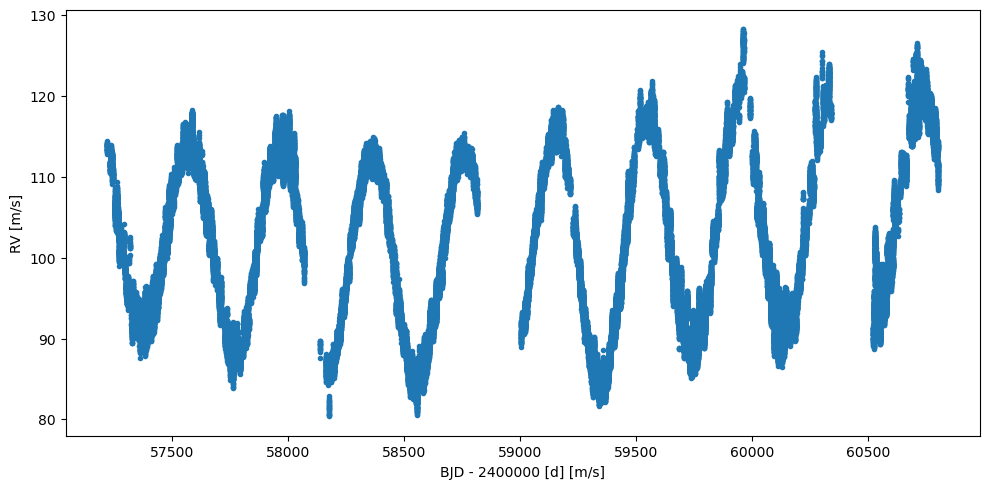

In [170]:
# Plot the raw radial velocities, in the Solar System barycenter rest frame
plt.figure(figsize=(10, 5))
plt.plot(data.obj_date_bjd, data.spectro_ccf_rv, ".")
plt.xlabel("BJD - 2400000 [d] [m/s]")
plt.ylabel("RV [m/s]")
plt.tight_layout()
print('Here we clearly see the 12 m/s signal of Jupiter at its synodic period 398.88 days (~365.25+365.25/11.862yrs)')

Tranform the raw RVs in the heliocentric rest frame, and correct for differential extinction and optimised RV correction. As we can see, the result is the same as the `data.spectro_ccf_rv_corr` timeseries.

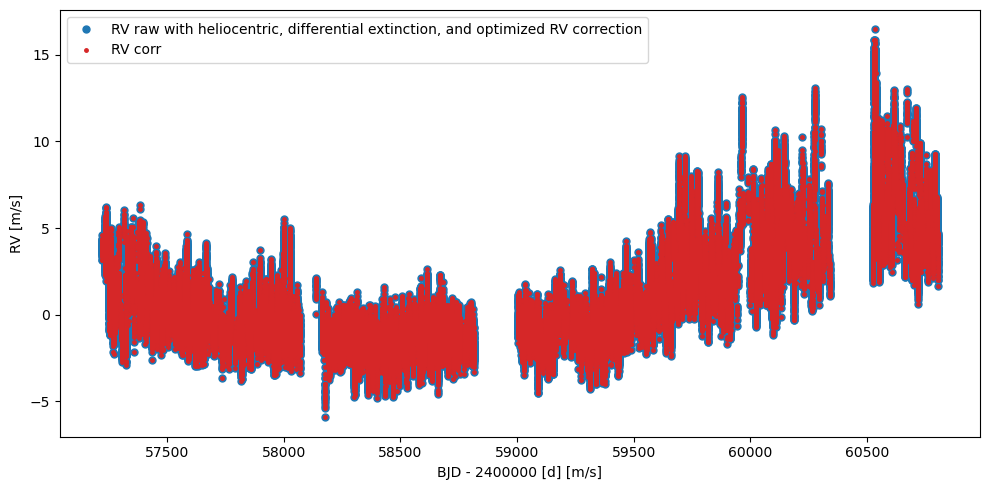

In [171]:
rv_corr = (
    data.spectro_ccf_rv
    - data.spectro_analysis_berv_helio_bary
    - data.spectro_analysis_diff_extinction
    - data.spectro_analysis_optimized_rv_corr
    - 0.16759939657*1000
)

plt.figure(figsize=(10, 5))
plt.plot(
    data.obj_date_bjd,
    rv_corr,
    marker=".",
    ls="",
    ms=10,
    color="C0",
    label="RV raw with heliocentric, differential extinction, and optimized RV correction",
)
plt.plot(
    data.obj_date_bjd,
    data.spectro_ccf_rv_corr,
    marker=".",
    ls="",
    ms=5,
    color="C3",
    label="RV corr",
)
plt.legend()
plt.xlabel("BJD - 2400000 [d] [m/s]")
plt.ylabel("RV [m/s]")
plt.tight_layout()

Looking at the correlation between the RVs and the log(R'$_{HK}$) calcium activity indexe

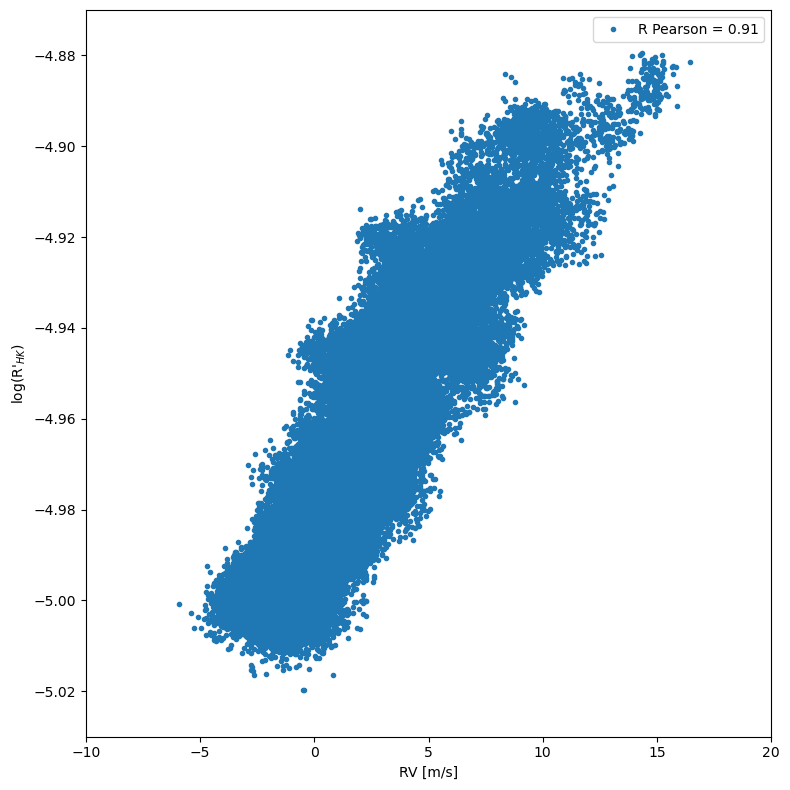

In [172]:
plt.figure(figsize=(8, 8))
plt.plot(data.spectro_ccf_rv_corr, data.spectro_analysis_rhk, ".", label="R Pearson = %.2f" % np.corrcoef(data.spectro_ccf_rv_corr, data.spectro_analysis_rhk)[0][1])
# Put axis limits to ignore the outliers
plt.ylim(-5.03, -4.87)
plt.xlim(-10,20)
plt.xlabel("RV [m/s]")
plt.ylabel(r"log(R'$_{HK}$)")
plt.legend()
plt.tight_layout()

## Looking at a S2D spectrum

Download one S2D spectrum locally on your computer. S2D products are described on the README.pdf file available at https://dace.unige.ch/openData/?record=10.82180/dace-h4s8lp7c

In [173]:
file_rootpath = "r.HARPN.2018-06-08T13-20-27.252.fits"

In [174]:
Sun.download(
    "s2d",
    filters={"file_rootpath": {"contains": [file_rootpath]}},
    output_directory="/tmp",
    output_filename="%s_S2D_A.fits" % file_rootpath[:-5],
)

2025-07-18 15:19:57,376 - INFO - Downloading file on location : /tmp/r.HARPN.2018-06-08T13-20-27.252_S2D_A.fits


 Download : 10 MB

2025-07-18 15:20:05,611 - INFO - File downloaded on location : /tmp/r.HARPN.2018-06-08T13-20-27.252_S2D_A.fits


 Download : 11 MB
Download done


In [175]:
filename = "/tmp/r.HARPN.2018-06-08T13-20-27.252_S2D_A.fits"
# flux corrected from blaze
flux_s2d = fits.getdata(filename, 1)
# flux error corrected from blaze
flux_err_s2d = fits.getdata(filename, 2)
# wavelength solution in the air
wave_s2d = fits.getdata(filename, 5)
# Size of a pixel in wavelength, in the air
pixel_size_s2d = fits.getdata(filename, 7)

Plotting order 50 of the spectrograph

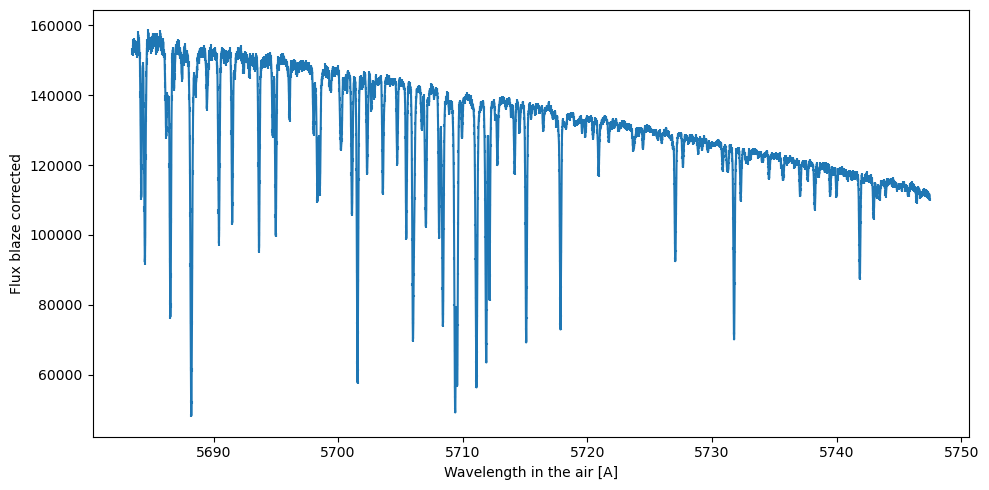

In [176]:
order = 50
plt.figure(figsize=(10, 5))
plt.errorbar(wave_s2d[order], flux_s2d[order], flux_err_s2d[order])
plt.xlabel("Wavelength in the air [A]")
plt.ylabel("Flux blaze corrected")
plt.tight_layout()

As we can see, the continuum is not flat, due to dispersion. We can correct that by dividing the flux by the pixel size 

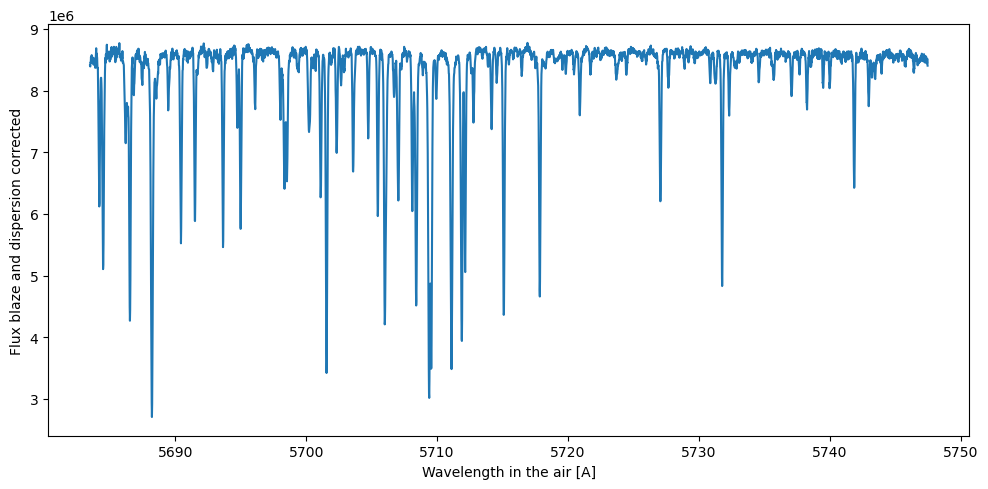

In [177]:
plt.figure(figsize=(10, 5))
plt.plot(wave_s2d[order], flux_s2d[order] / pixel_size_s2d[order])
plt.xlabel("Wavelength in the air [A]")
plt.ylabel("Flux blaze and dispersion corrected")
plt.tight_layout()

## Looking at a S1D spectrum


Download one S1D spectrum locally on your computer. S1D products are described on the README.pdf file available at https://dace.unige.ch/openData/?record=10.82180/dace-h4s8lp7c

In [178]:
Sun.download(
    "s1d",
    filters={"file_rootpath": {"contains": [file_rootpath]}},
    output_directory="/tmp",
    output_filename="%s_S1D_A.fits" % file_rootpath[:-5],
)

2025-07-18 15:20:11,174 - INFO - Downloading file on location : /tmp/r.HARPN.2018-06-08T13-20-27.252_S1D_A.fits


 Download : 7 MB

2025-07-18 15:20:19,219 - INFO - File downloaded on location : /tmp/r.HARPN.2018-06-08T13-20-27.252_S1D_A.fits



Download done


In [179]:
s1d = fits.getdata("/tmp/r.HARPN.2018-06-08T13-20-27.252_S1D_A.fits", 1)
s1d.columns

ColDefs(
    name = 'wavelength'; format = '1D'; unit = 'angstrom'
    name = 'wavelength_air'; format = '1D'; unit = 'angstrom'
    name = 'flux'; format = '1D'; unit = 'e-'
    name = 'error'; format = '1D'; unit = 'e-'
    name = 'quality'; format = '1J'
)

Plotting the S1D spectrum

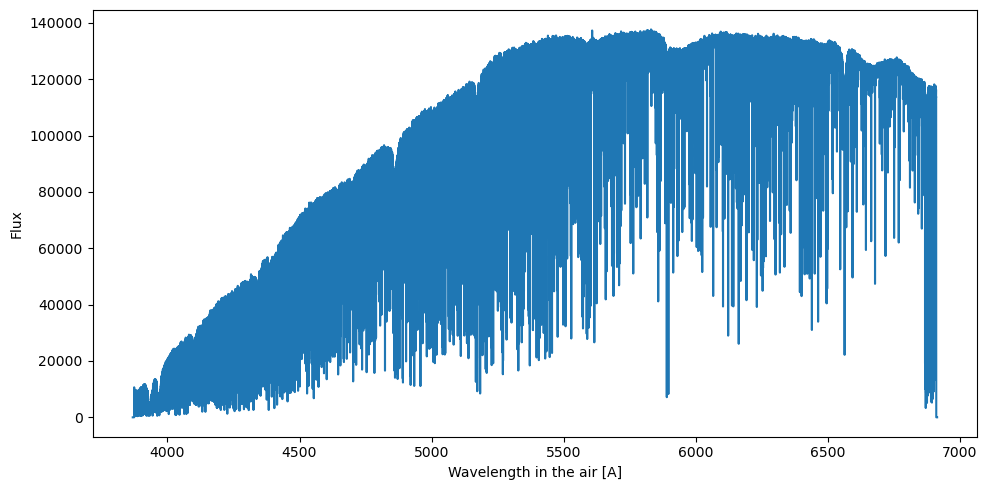

In [180]:
plt.figure(figsize=(10, 5))
plt.plot(s1d["wavelength_air"], s1d["flux"])
plt.xlabel("Wavelength in the air [A]")
plt.ylabel("Flux")
plt.tight_layout()

## Looking at a CCF file



Download one CCF locally on your computer. CCF products are described on the README.pdf file available at https://dace.unige.ch/openData/?record=10.82180/dace-h4s8lp7c

In [181]:
Sun.download(
    "ccf",
    filters={"file_rootpath": {"contains": [file_rootpath]}},
    output_directory="/tmp",
    output_filename="%s_CCF_A.fits" % file_rootpath[:-5],
)

2025-07-18 15:20:22,124 - INFO - Downloading file on location : /tmp/r.HARPN.2018-06-08T13-20-27.252_CCF_A.fits
2025-07-18 15:20:23,388 - INFO - File downloaded on location : /tmp/r.HARPN.2018-06-08T13-20-27.252_CCF_A.fits



Download done


In [2]:
ccf_header = fits.getheader("2015-11-01/r.HARPN.2015-11-01T11-37-14.939_CCF_A.fits")
ccf = fits.getdata("2015-11-01/r.HARPN.2015-11-01T11-37-14.939_CCF_A.fits", 1)

Plotting the CCF for order 35 and the CCF averaged over all the orders

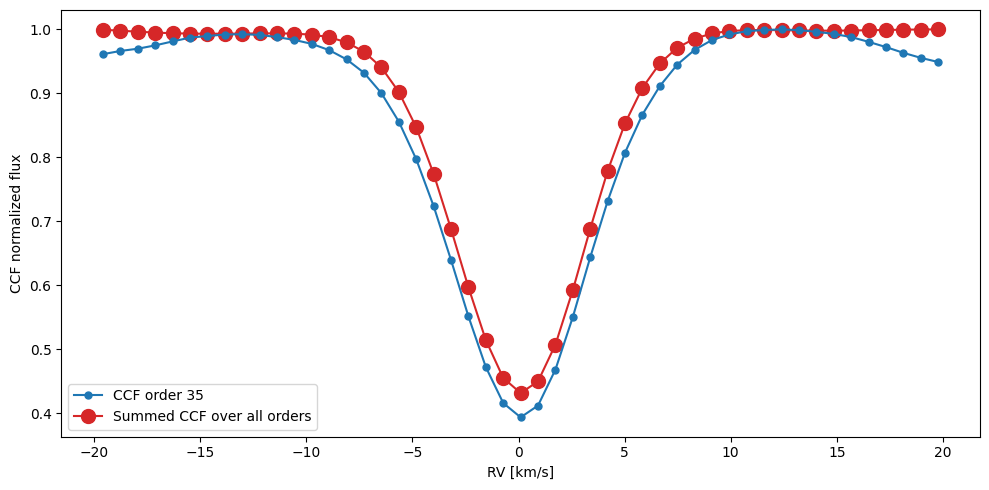

In [8]:
order = 35
plt.figure(figsize=(10, 5))
CCF_rv = np.arange(
    ccf_header["TNG RV START"],
    ccf_header["TNG RV START"] + len(ccf[0]) * ccf_header["TNG RV STEP"],
    ccf_header["TNG RV STEP"],
)
# plot the CCF of a specific order
plt.plot(
    CCF_rv,
    ccf[order] / max(ccf[order]),
    zorder=1,
    marker="o",
    ms=5,
    color="C0",
    label="CCF order %i" % (order),
)
# plot the summed ccf over all orders (last matrix element)
plt.plot(
    CCF_rv,
    ccf[-1] / max(ccf[-1]),
    zorder=0,
    marker="o",
    ms=10,
    color="C3",
    label="Summed CCF over all orders",
)
plt.legend()
plt.xlabel("RV [km/s]")
plt.ylabel("CCF normalized flux")
plt.tight_layout()

(c) 2025 Data Analysis Center for exoplanets, Univerity of Geneva, Switzerland